time for random hill climbing : 0.010981082999997227
time for simulated annealing : 0.016315003000002548
time for genetic algorithm : 1.941165519000002
time for mimic : 135.775184817
random_hill_climbing =  (array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]), 63.0, array([[48.,  1.],
       [48.,  2.],
       [48.,  3.],
       [50.,  5.],
       [50.,  6.],
       [50.,  7.],
       [52.,  9.],
       [52., 10.],
       [52., 11.],
       [52., 12.],
       [52., 13.],
       [52., 14.],
       [52., 15.],
       [52., 16.],
       [54., 18.],
       [54., 19.],
       [54., 20.],
       [54., 21.],
       [54., 22.],
       [54., 23.],
       [56., 25.],
       [58., 27.],
       [60., 29.],
       [60.,

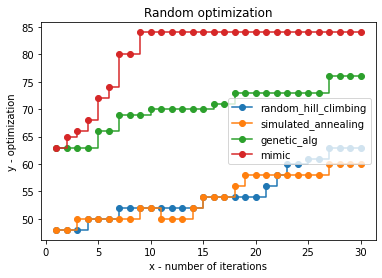

In [1]:
# First comparisons of the 4 algorithms on flip flop

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 30
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ', simulated_annealing)
print('genetic_alg = ',genetic_alg)
print('mimic = ',mimic)


iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(max_iters)]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(max_iters)]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]
y_mimic = [mimic[2][i][0] for i in range(max_iters)]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations , y_genetic_alg ,marker="o",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations , y_mimic ,marker="o", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()


time for random hill climbing : 0.011952395001571858
time for simulated annealing : 0.021414447997813113
time for genetic algorithm : 1.9715495350028505
time for mimic : 53.70709570299732
random_hill_climbing =  (array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1]), 36.0, array([[26.,  2.],
       [26.,  3.],
       [28.,  5.],
       [28.,  6.],
       [28.,  7.],
       [28.,  8.],
       [28.,  9.],
       [28., 10.],
       [28., 11.],
       [30., 13.],
       [30., 14.],
       [32., 16.],
       [32., 17.],
       [32., 18.],
       [32., 19.],
       [32., 20.],
       [32., 21.],
       [32., 22.],
       [32., 23.],
       [32., 24.],
       [32., 25.],
       [32., 26.],
       [32., 27.],
       [32., 28.],
       [32., 29.],
       [32., 30.],
       [32., 31.],
       [32., 32.],
       [32., 33.],
       [34., 35.],
       [34., 36.],
       [34., 37.],


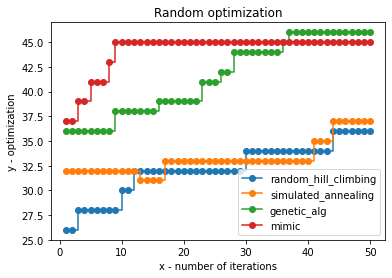

In [52]:
import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt


# length (int) – Number of elements in state vector.
length = 100
# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

iter = 50

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=iter, max_iters=iter, restarts=0,
                      init_state=None, curve=True, random_state=1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=iter,
                        max_iters=iter, init_state=None, curve=True,
                        random_state=1)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=iter,
                max_iters=iter, curve=True, random_state=1)

time4 = time.perf_counter()
timeC = time4 - time3
print('time for genetic algorithm :', timeC)

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=iter,
          max_iters=iter, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('random_hill_climbing = ',random_hill_climbing)
#print('simulated_annealing = ', simulated_annealing)
#print('genetic_alg = ',genetic_alg)

iterations = np.linspace(1,iter,iter,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(iter)]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(iter)]
y_genetic_alg = [genetic_alg[2][i][0] for i in range(iter)]
y_mimic = [mimic[2][i][0] for i in range(iter)]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.plot(iterations , y_genetic_alg ,marker="o",label="genetic_alg",drawstyle="steps-post")
ax.plot(iterations , y_mimic ,marker="o", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random optimization')
ax.legend()
plt.show()

 

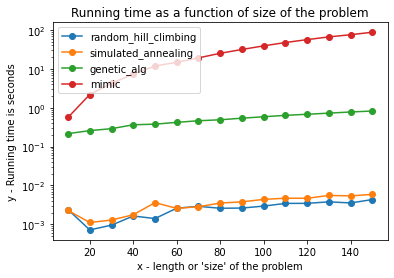

In [131]:
# implementation time with a logarithmic scale
import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

time_random_hill_climbing = []
time_simulated_annealing = []
time_genetic_alg = []
time_mimic = []

for k in range(10,160,10):
    # length (int) – Number of elements in state vector.
    length = k
    # fitness_fn (fitness function object) – Object to implement fitness function for optimization.
    fitness_fn = mlrose_hiive.FlipFlop()
    # maximize (bool, default: True) – Whether to maximize the fitness function. 
    # max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
    #    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

    problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

    # Maximum number of attempts to find a better neighbor at each step.
    max_attempts = 20
    # Maximum number of iterations of the algorithm
    max_iters = 10

    time1 = time.perf_counter()
    random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=None)

    time2 = time.perf_counter()
    timeA = time2 - time1
    time_random_hill_climbing.append(timeA)

    simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=None)

    time3 = time.perf_counter()
    timeB = time3 - time2
    time_simulated_annealing.append(timeB)

    genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=1)

    time4 = time.perf_counter()
    timeC = time4 - time3
    time_genetic_alg.append(timeC)

    mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

    time5 = time.perf_counter()
    timeD = time5 - time4
    time_mimic.append(timeD)



# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time in seconds")
ax.set_yscale("log")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()


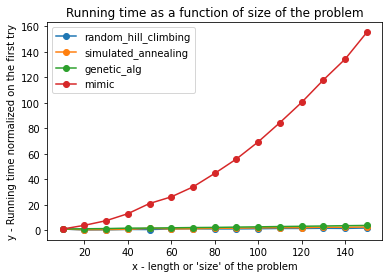

In [133]:
# implementation time with a normal scale

time_random_hill_climbing_normalized = [time_random_hill_climbing[i]/time_random_hill_climbing[0] for i in range(len(time_random_hill_climbing))]
time_simulated_annealing_normalized = [time_simulated_annealing[i]/time_simulated_annealing[0] for i in range(len(time_simulated_annealing))]
time_genetic_alg_normalized = [time_genetic_alg[i]/time_genetic_alg[0] for i in range(len(time_genetic_alg))]
time_mimic_normalized = [time_mimic[i]/time_mimic[0] for i in range(len(time_mimic))]

# plotting the graph
iterations = np.linspace(10,150,15,dtype="int")

fig, ax = plt.subplots()
ax.plot(iterations , time_random_hill_climbing_normalized , marker="o", label="random_hill_climbing")
ax.plot(iterations , time_simulated_annealing_normalized ,marker="o",label="simulated_annealing")
ax.plot(iterations , time_genetic_alg_normalized ,marker="o",label="genetic_alg")
ax.plot(iterations , time_mimic_normalized ,marker="o", label="mimic")
ax.set_xlabel("x - length or 'size' of the problem")
ax.set_ylabel("y - Running time normalized on the first try")
ax.set_title("Running time as a function of size of the problem")
ax.legend()
plt.show()

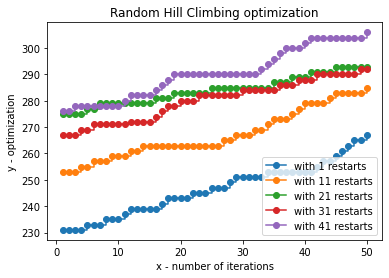

In [172]:
# Vary the number of restarts

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random


# length (int) – Number of elements in state vector.
length = 500
# Maximum number of iterations of the algorithm
max_iters = 50
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters
# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time_random_hill_climbing = [] 
list_y_random_hill_climbing = []

iterations = np.linspace(1,max_iters,max_iters,dtype="int")

for k in range(1,51,10):
    time1 = time.perf_counter()
    random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=k,
                      init_state=None, curve=True, random_state=1)

    time2 = time.perf_counter()
    timeA = time2 - time1
    time_random_hill_climbing.append(timeA)
    # print('time for random hill climbing :', timeA)

    # print('random_hill_climbing = ',random_hill_climbing)

    y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(max_iters)]
    list_y_random_hill_climbing.append(y_random_hill_climbing)
    
# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(iterations , list_y_random_hill_climbing[i-1] , marker="o", label='with {} restarts'.format(10*(i-1)+1),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Random Hill Climbing optimization')
ax.legend()
plt.show()

No handles with labels found to put in legend.


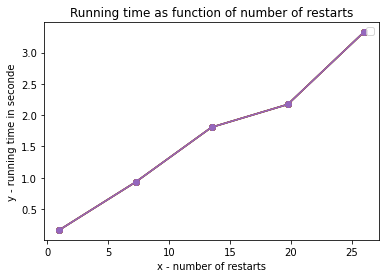

In [173]:
fig, ax = plt.subplots()
restarts = np.linspace(1,26,5)
for i in range(1,6):
    ax.plot(restarts , time_random_hill_climbing , marker="o")
ax.set_xlabel('x - number of restarts')
ax.set_ylabel('y - running time in second')
ax.set_title('Running time as function of number of restarts')
ax.legend()
plt.show()

time for random hill climbing : 2.4133329380129
time for simulated annealing : 2.684515578992432
random_hill_climbing =  (array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]), 76.0, array([[5.6000e+01, 2.0000e+00],
       [5.6000e+01, 3.0000e+00],
       [5.6000e+01, 4.0000e+00],
       ...,
       [7.6000e+01, 1.0009e+04],
       [7.6000e+01, 1.0010e+04],
       [7.6000e+01, 1.0011e+04]]))
simulated_annealing =  (array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       

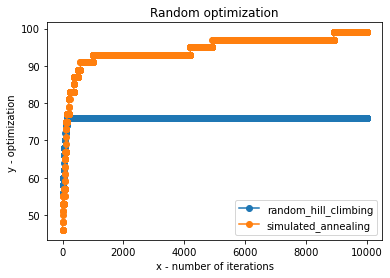

In [203]:
# Study of RHC and SA alone

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random


# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 10000
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time1 = time.perf_counter()
random_hill_climbing = mlrose_hiive.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters, restarts=0,
                      init_state=None, curve=True, random_state=None)


time2 = time.perf_counter()
timeA = time2 - time1
print('time for random hill climbing :', timeA)

simulated_annealing = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(), max_attempts=max_attempts,
                        max_iters=max_iters, init_state=None, curve=True,
                        random_state=None)

time3 = time.perf_counter()
timeB = time3 - time2
print('time for simulated annealing :', timeB)

print('random_hill_climbing = ',random_hill_climbing)
print('simulated_annealing = ',simulated_annealing)
# plotting the graph
iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_random_hill_climbing = [random_hill_climbing[2][i][0] for i in range(max_iters)]
y_simulated_annealing = [simulated_annealing[2][i][0] for i in range(max_iters)]

fig, ax = plt.subplots()
ax.plot(iterations , y_random_hill_climbing , marker="o", label="random_hill_climbing",drawstyle="steps-post")
ax.plot(iterations , y_simulated_annealing ,marker="o",label="simulated_annealing",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization ')
ax.set_title('Random optimization')
ax.legend()
plt.show()

time for mimic : 76.72829662798904
mimic =  (array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]), 84.0, array([[  63.,  402.],
       [  65.,  604.],
       [  66.,  806.],
       [  68., 1008.],
       [  72., 1210.],
       [  74., 1412.],
       [  80., 1614.],
       [  80., 1815.],
       [  84., 2017.],
       [  84., 2218.],
       [  84., 2419.],
       [  84., 2620.],
       [  84., 2821.],
       [  84., 3022.],
       [  84., 3223.],
       [  84., 3424.],
       [  84., 3625.],
       [  84., 3826.],
       [  84., 4027.],
       [  84., 4228.]]))


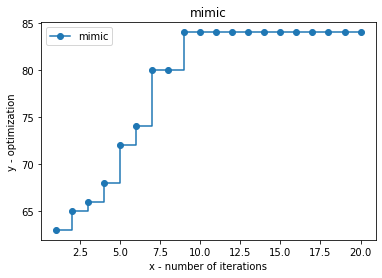

In [204]:
# Study of mimic alone

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random

# length (int) – Number of elements in state vector.
length = 100
# Maximum number of iterations of the algorithm
max_iters = 20
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

time4 = time.perf_counter()

mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=max_attempts,
          max_iters=max_iters, curve=True, random_state=1)

time5 = time.perf_counter()
timeD = time5 - time4
print('time for mimic :', timeD)

print('mimic = ',mimic)


iterations = np.linspace(1,max_iters,max_iters,dtype="int")
y_mimic = [mimic[2][i][0] for i in range(max_iters)]


# plotting the graph

fig, ax = plt.subplots()
ax.plot(iterations , y_mimic ,marker="o", label="mimic",drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('mimic')
ax.legend()
plt.show()



time for genetic algorithm : 2.148448855994502
time for genetic algorithm : 2.076357750003808
time for genetic algorithm : 2.2177325950033264
time for genetic algorithm : 2.0261560340004507
time for genetic algorithm : 2.037977319996571


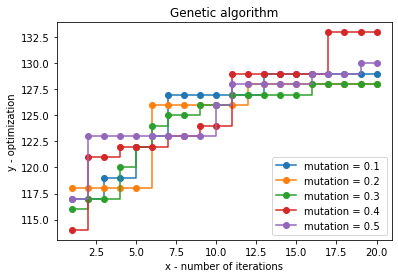

In [169]:
# Varying mutation for GA

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random


# length (int) – Number of elements in state vector.
length = 200
# Maximum number of iterations of the algorithm
max_iters = 20
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

y_mut_genetic_alg = []

iterations = np.linspace(1,max_iters,max_iters,dtype="int")

for i in range(1,6):

    time3 = time.perf_counter()

    genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=i/10, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=None)
    
    y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]

    time4 = time.perf_counter()
    timeC = time4 - time3
    print('time for genetic algorithm :', timeC)
    
    y_mut_genetic_alg.append(y_genetic_alg)



iterations = np.linspace(1,max_iters,max_iters,dtype="int")



# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(iterations , y_mut_genetic_alg[i-1] , marker="o", label='mutation = {} '.format(i/10),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Genetic algorithm')
ax.legend()
plt.show()



time for genetic algorithm : 1.262045843002852
time for genetic algorithm : 2.3990104279946536
time for genetic algorithm : 3.5653419169975678
time for genetic algorithm : 4.708816292986739
time for genetic algorithm : 5.919706696004141


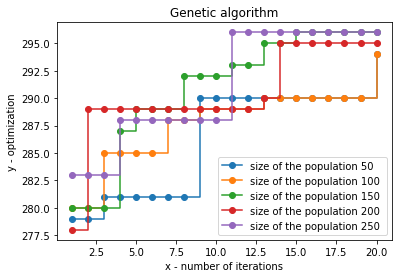

In [176]:
# GA population

import io
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import random


# length (int) – Number of elements in state vector.
length = 500
# Maximum number of iterations of the algorithm
max_iters = 20
# Maximum number of attempts to find a better neighbor at each step.
max_attempts = max_iters

# fitness_fn (fitness function object) – Object to implement fitness function for optimization.
fitness_fn = mlrose_hiive.FlipFlop()
# maximize (bool, default: True) – Whether to maximize the fitness function. 
# max_val (int, default: 2) – Number of unique values that each element in the state vector can take. 
#    Assumes values are integers in the range 0 to (max_val - 1), inclusive.

problem = mlrose_hiive.DiscreteOpt(length , fitness_fn, maximize=True, max_val=2)

y_mut_genetic_alg = []

iterations = np.linspace(1,max_iters,max_iters,dtype="int")

for i in range(1,6):

    time3 = time.perf_counter()

    genetic_alg = mlrose_hiive.genetic_alg(problem, pop_size=50*i, mutation_prob=0.1, max_attempts=max_attempts,
                max_iters=max_iters, curve=True, random_state=None)
    
    y_genetic_alg = [genetic_alg[2][i][0] for i in range(max_iters)]

    time4 = time.perf_counter()
    timeC = time4 - time3
    print('time for genetic algorithm :', timeC)
    
    y_mut_genetic_alg.append(y_genetic_alg)



iterations = np.linspace(1,max_iters,max_iters,dtype="int")



# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(iterations , y_mut_genetic_alg[i-1] , marker="o", label='size of the population {} '.format(50*i),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - optimization')
ax.set_title('Genetic algorithm')
ax.legend()
plt.show()